In [1]:
# Install Libraries
library(tidyverse)

In [24]:
# load the dataset
data <- read.table("data/insurance.csv", header = TRUE, sep = ",")
data

index,age,sex,bmi,children,smoker,region,charges
<int>,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.471
4,32,male,28.880,0,no,northwest,3866.855
5,31,female,25.740,0,no,southeast,3756.622
6,46,female,33.440,1,no,southeast,8240.590
7,37,female,27.740,3,no,northwest,7281.506
8,37,male,29.830,2,no,northeast,6406.411


## 2.1 Cleaning the Dataset

In [3]:
sum(is.na(data))
## no NA values present in the datatset

[1] 0

## 2.2  Exploratory Data Analysis of the Dataset

### Individual Variable Visualisation & Exploration

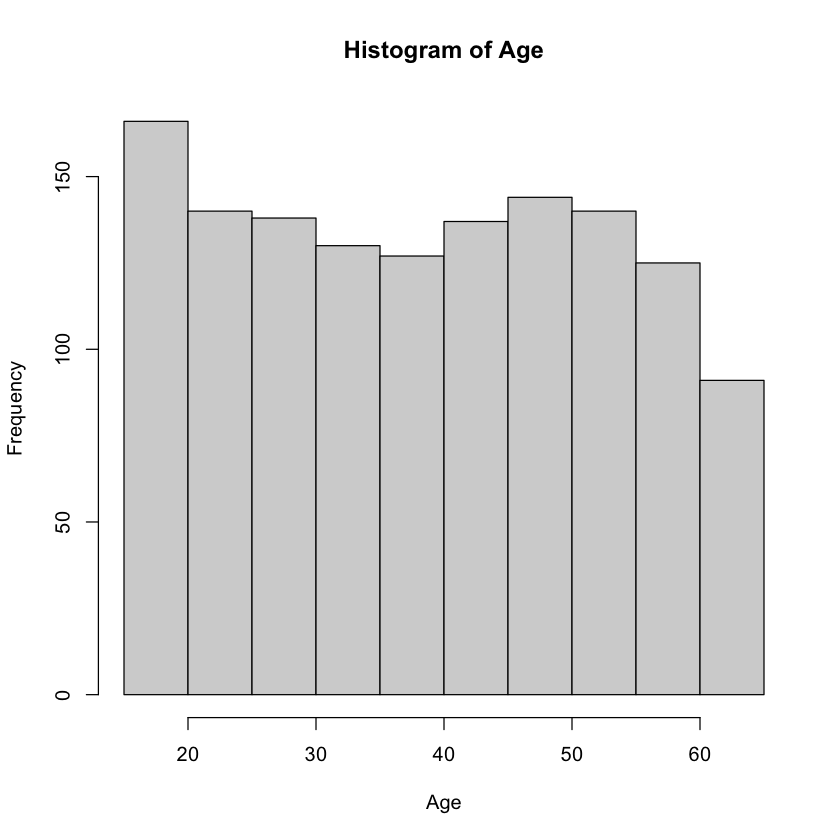

In [15]:
# Visualisation of Age - Histogram

hist(data$age, main = "Histogram of Age", xlab = "Age")

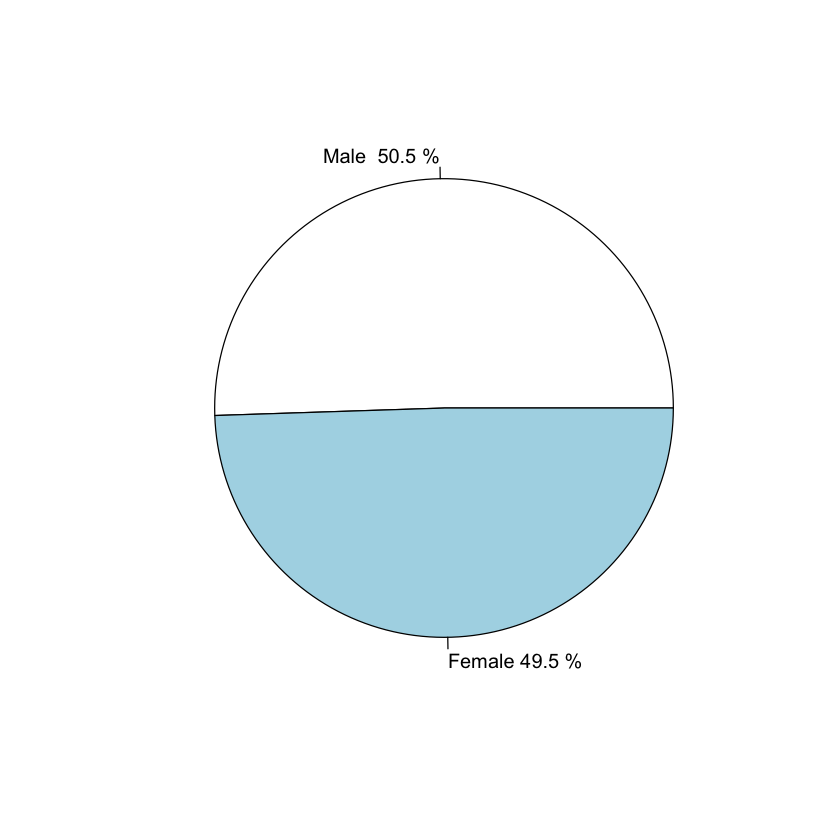

In [14]:
# Visualisation of Sex - Pie Chart
sex <- c(sum(data$sex == "male"), sum(data$sex == "female"))
# male, female = 676, 662
male_percentage <- round(676 / (676 + 662) * 100, 1)
female_percentage <- 100 - male_percentage
pie(sex, labels = c(paste("Male ", male_percentage, "%"), paste("Female", female_percentage, "%")))

## Sex vairable shows a uniform distribution. This accounts for potential confounding variables from Sex. 

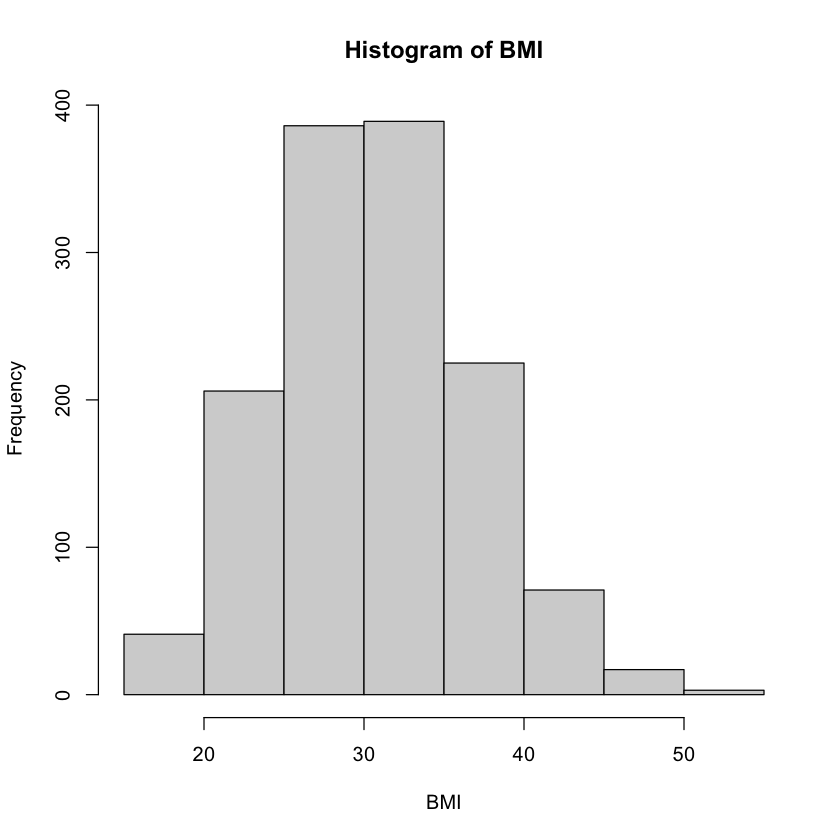

In [18]:
# Visualisation of BMI - Histogram
hist(data$bmi, main = "Histogram of BMI", xlab = "BMI")

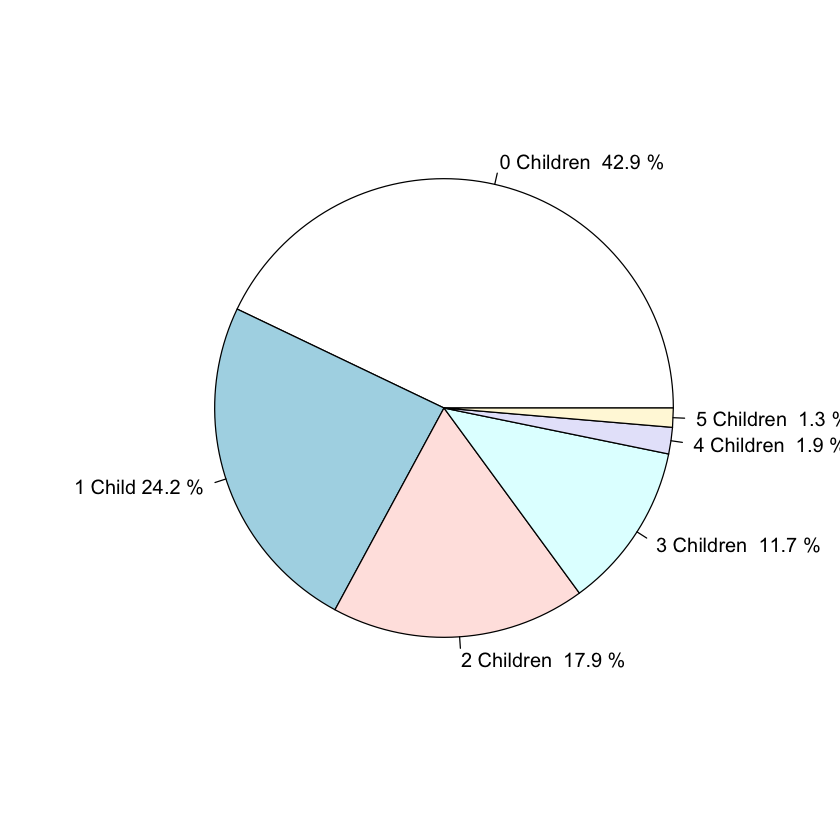

In [23]:
# Visualisation of Children - Pie Chart
children <- c(sum(data$children == "0"), sum(data$children == "1"), sum(data$children == "2"),  sum(data$children == "3"),  sum(data$children == "4"),  sum(data$children == "5"))
# 0 children, 1 children, 2 children, 3 children, 4 children, 5 children = 574, 324, 240, 157, 25, 18
child_0_percentage <- round(574 / sum(children) * 100, 1)
child_1_percentage <- round(324 / sum(children) * 100, 1)
child_2_percentage <- round(240 / sum(children) * 100, 1)
child_3_percentage <- round(157 / sum(children) * 100, 1)
child_4_percentage <- round(25 / sum(children) * 100, 1)
child_5_percentage <- round(18 / sum(children) * 100, 1)
pie(children, labels = c(paste("0 Children ", child_0_percentage, "%"), paste("1 Child", child_1_percentage, "%"), paste("2 Children ", child_2_percentage, "%"), paste("3 Children ", child_3_percentage, "%"), paste("4 Children ", child_4_percentage, "%"), paste("5 Children ", child_5_percentage, "%")))

[1]  274 1064


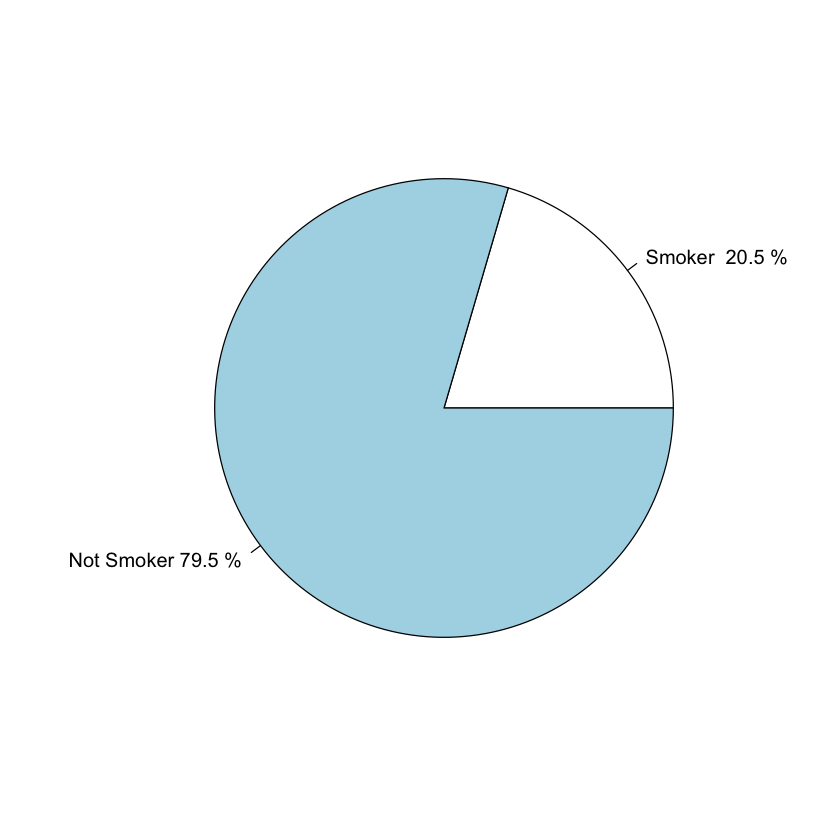

In [27]:
# Visualisation of Sex - Pie Chart
smoker <- c(sum(data$smoker == "yes"), sum(data$smoker == "no"))
# yes, no = 274, 1064
smoker_yes_percentage <- round(274 / sum(smoker) * 100, 1)
smoker_no_percentage <- 100 - smoker_yes_percentage
pie(smoker, labels = c(paste("Smoker ", smoker_yes_percentage, "%"), paste("Not Smoker", smoker_no_percentage, "%")))

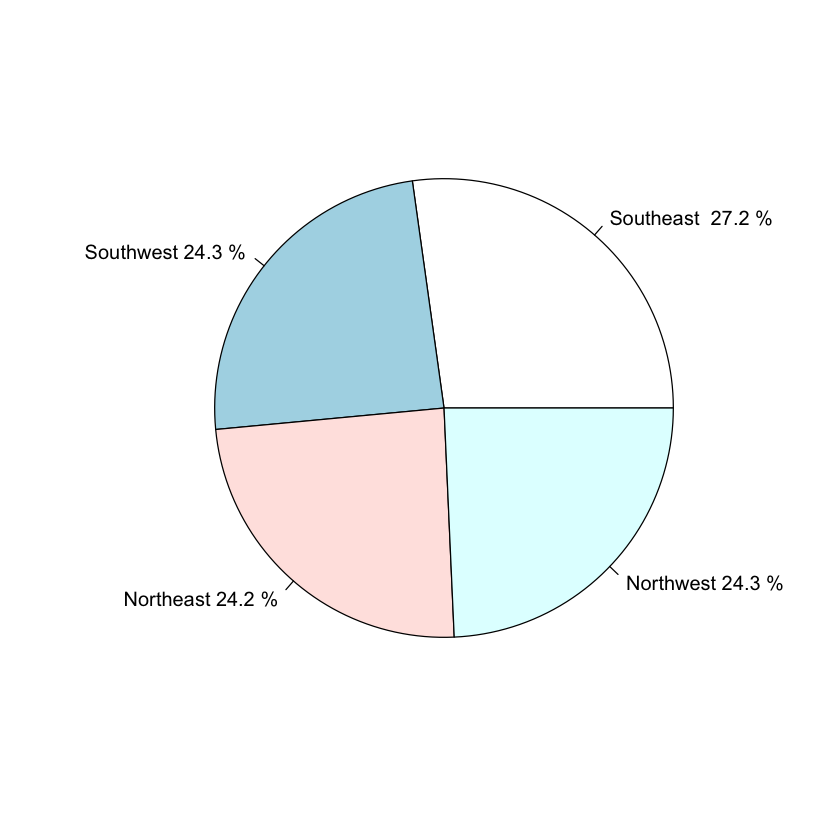

In [29]:
# Visualisation of Region - Pie Chart
region <- c(sum(data$region == "southeast"), sum(data$region == "southwest"), sum(data$region == "northeast"), sum(data$region == "northwest"))
# southeast, southwest, northeast, northwest = 364, 325, 324, 325
southeast_percentage <- round(364 / sum(region) * 100, 1)
southwest_percentage <- round(325 / sum(region) * 100, 1)
northeast_percentage <- round(324 / sum(region) * 100, 1)
northwest_percentage <- round(325 / sum(region) * 100, 1)
pie(region, labels = c(paste("Southeast ", southeast_percentage, "%"), paste("Southwest", southwest_percentage, "%"), paste("Northeast", northeast_percentage, "%"), paste("Northwest", northwest_percentage, "%")))
## Region vairable shows an almost uniform distribution. This accounts for potential confounding variables from Region. 

### Exploring Interaction between Variables

[1] 0.2990082

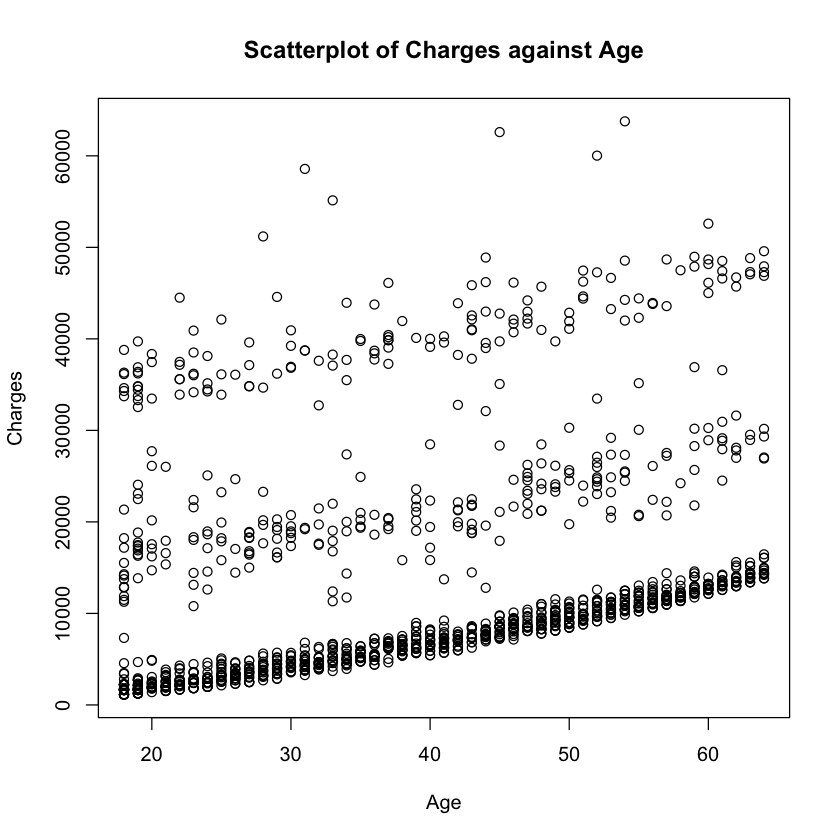

In [33]:
## Age and Charges
plot(data$age, data$charges, main = "Scatterplot of Charges against Age", ylab = "Charges", xlab = "Age")
cor(data$age, data$charges)
# low correlation between age and charges
# scatter plot shows an overall increasing trend -- an increase in age is correlated to an increase in charges

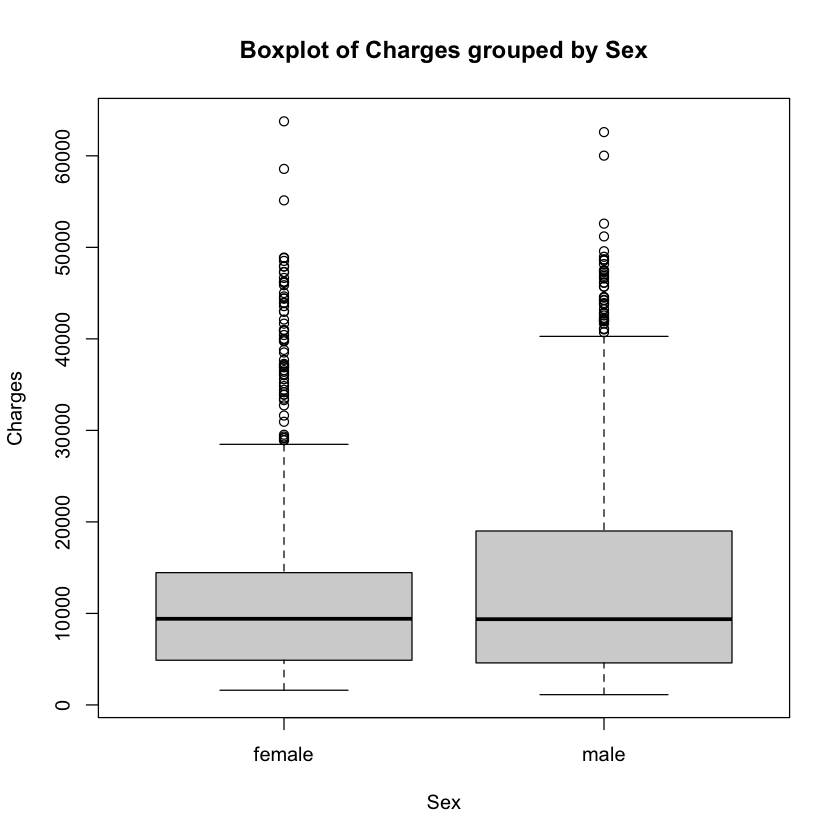

In [36]:
## Sex and Charges
boxplot(data$charges ~ data$sex, main = "Boxplot of Charges grouped by Sex", ylab = "Charges", xlab = "Sex")
# Charges show a similar distribution by sex, with females being more clustered and dense as compared to the male conterparts.  

[1] 0.198341

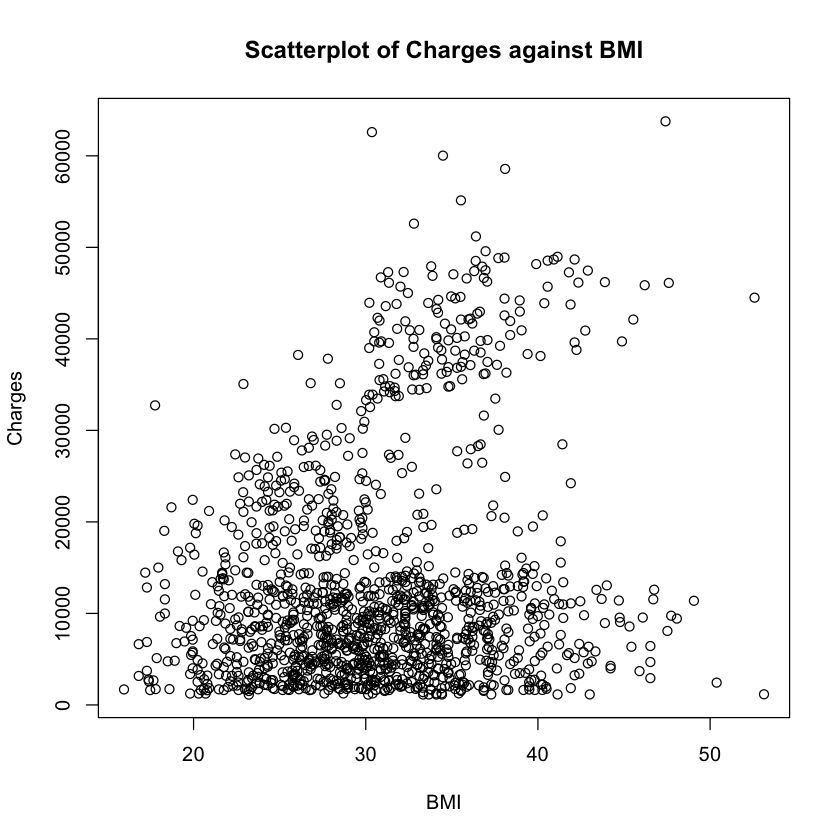

In [37]:
# BMI and Charges
plot(data$bmi, data$charges, main = "Scatterplot of Charges against BMI", ylab = "Charges", xlab = "BMI")
cor(data$bmi, data$charges)
## shows a somewhat increasing trend in the scatterplot
## correlation is low

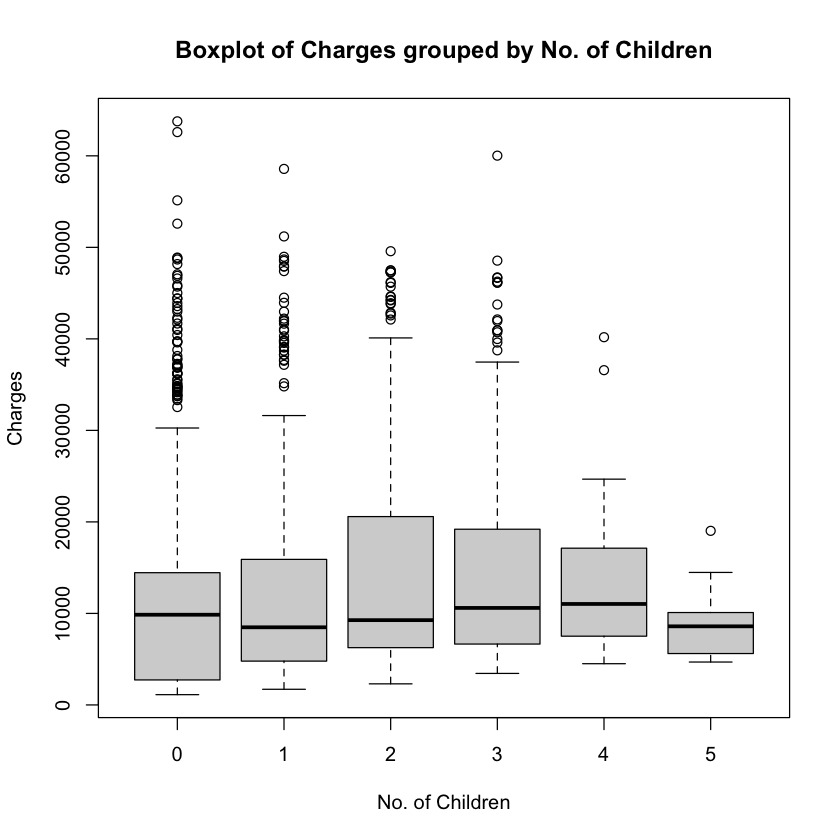

In [38]:
## Children and Charges
boxplot(data$charges ~ data$children, main = "Boxplot of Charges grouped by No. of Children", ylab = "Charges", xlab = "No. of Children")
# Distribution is not uniform across the number of children

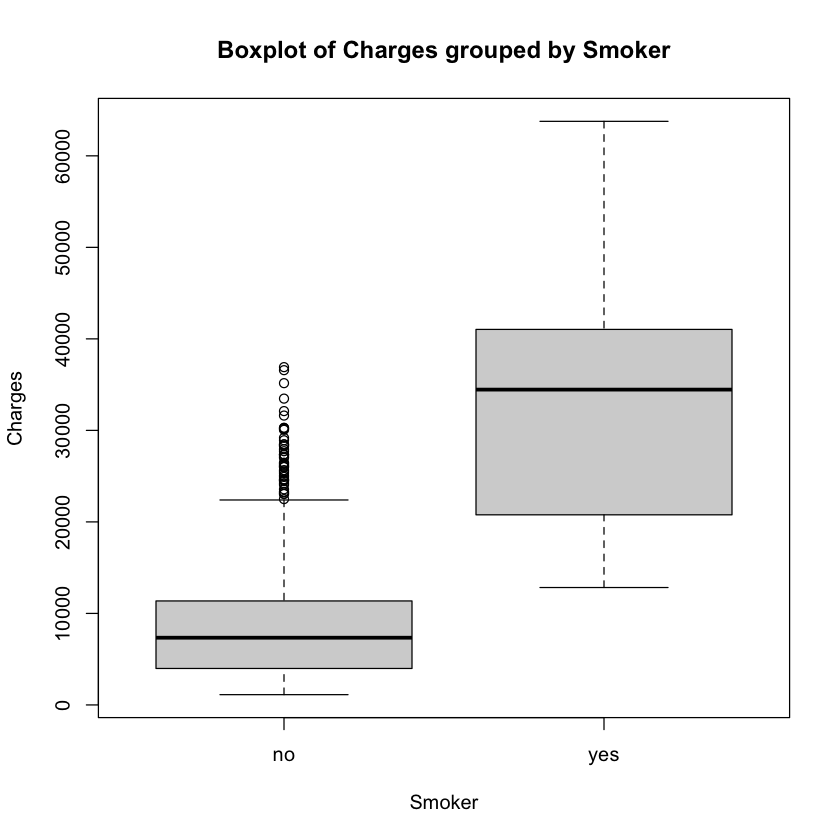

In [39]:
## Smoker and Charges
boxplot(data$charges ~ data$smoker, main = "Boxplot of Charges grouped by Smoker", ylab = "Charges", xlab = "Smoker")
# Distribution of charges shows great variation and differences when grouped by whether or not the individual smokes

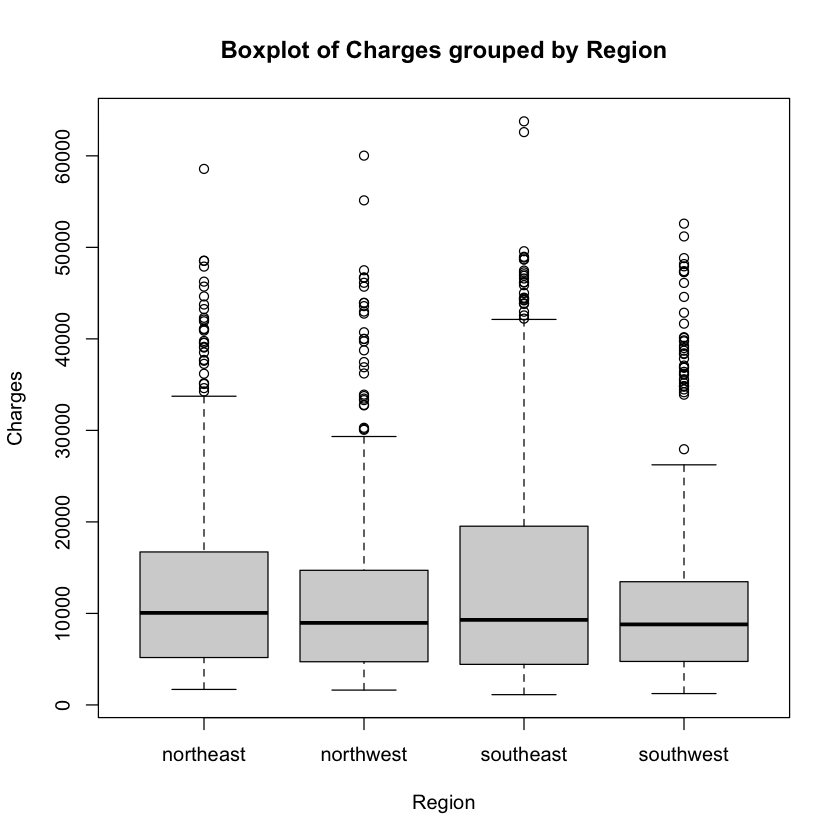

In [40]:
## Region and Charges
boxplot(data$charges ~ data$region, main = "Boxplot of Charges grouped by Region", ylab = "Charges", xlab = "Region")
# Distribution of charges looks relatively consistent across the 4 regions. 

From the exploratory data anlaysis conducted and visualisation plotted, we can conclude that key features are likely the following: age, bmi, children, smoker. 

### Summary of Key Features

We could display the individual plots and perhaps the median, mean, upper, lower quartile as part of the summary of key features. 

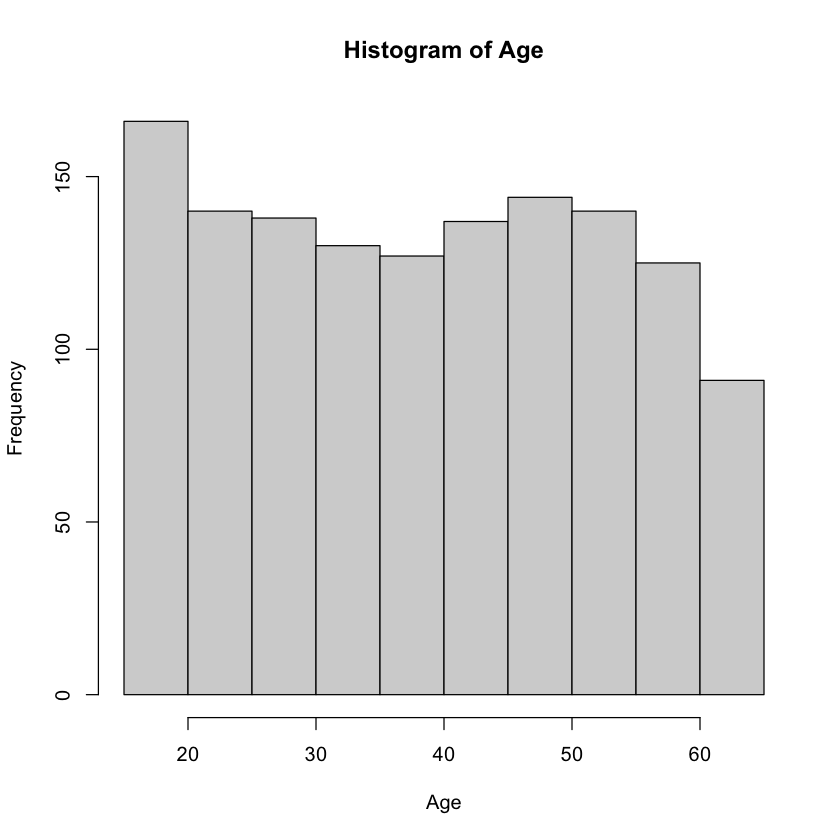

[1] "Minimum Age:  18"
[1] "Maximum Age:  64"
[1] "Median Age:  39"
[1] "Mean Age:  39.2070254110613"
  0%  25%  50%  75% 100% 
  18   27   39   51   64 


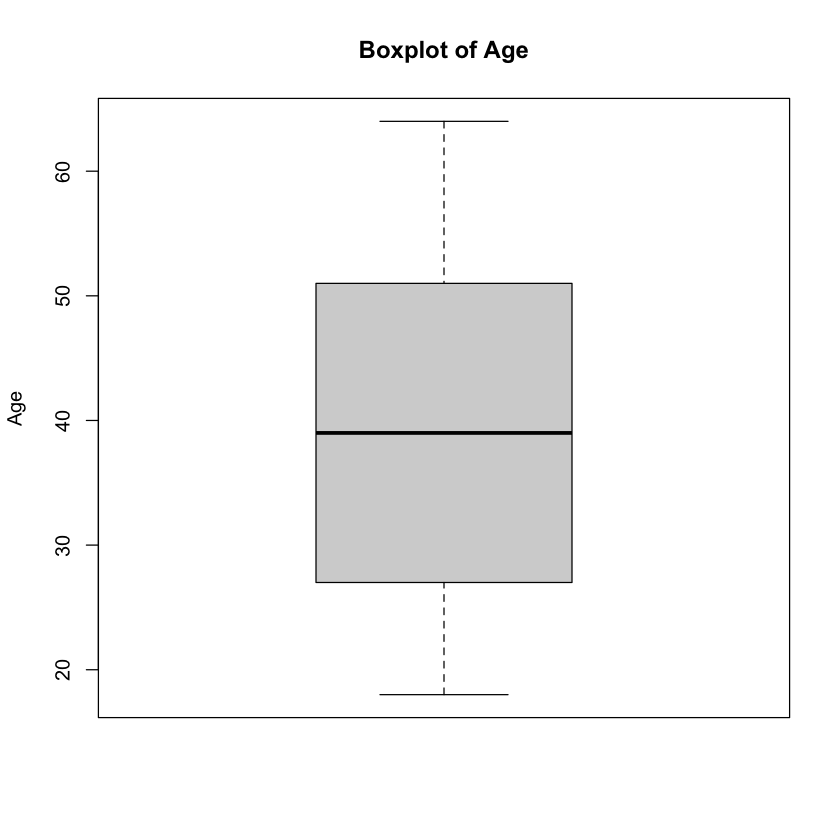

In [48]:
## Summary of Age
hist(data$age, main = "Histogram of Age", xlab = "Age")
boxplot(data$age, main = "Boxplot of Age", ylab = "Age")
print(paste("Minimum Age: ", min(data$age)))
print(paste("Maximum Age: ", max(data$age)))
print(paste("Median Age: ", median(data$age)))
print(paste("Mean Age: ", mean(data$age)))
print(quantile(data$age))

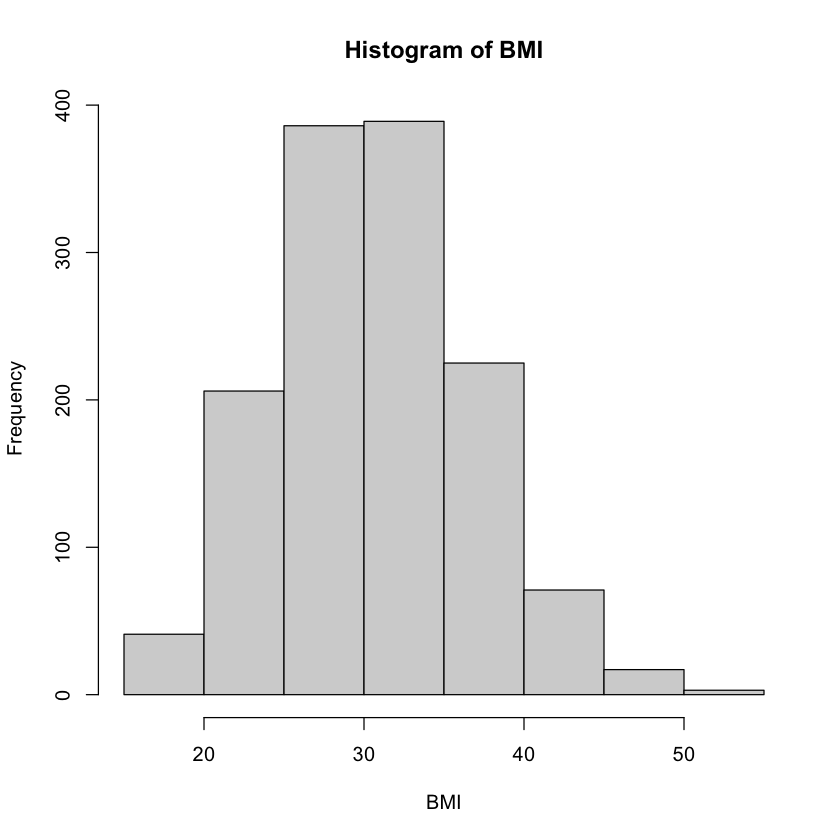

[1] "Minimum BMI:  15.96"
[1] "Maximum BMI:  53.13"
[1] "Median BMI:  30.4"
[1] "Mean BMI:  30.6633968609865"
      0%      25%      50%      75%     100% 
15.96000 26.29625 30.40000 34.69375 53.13000 


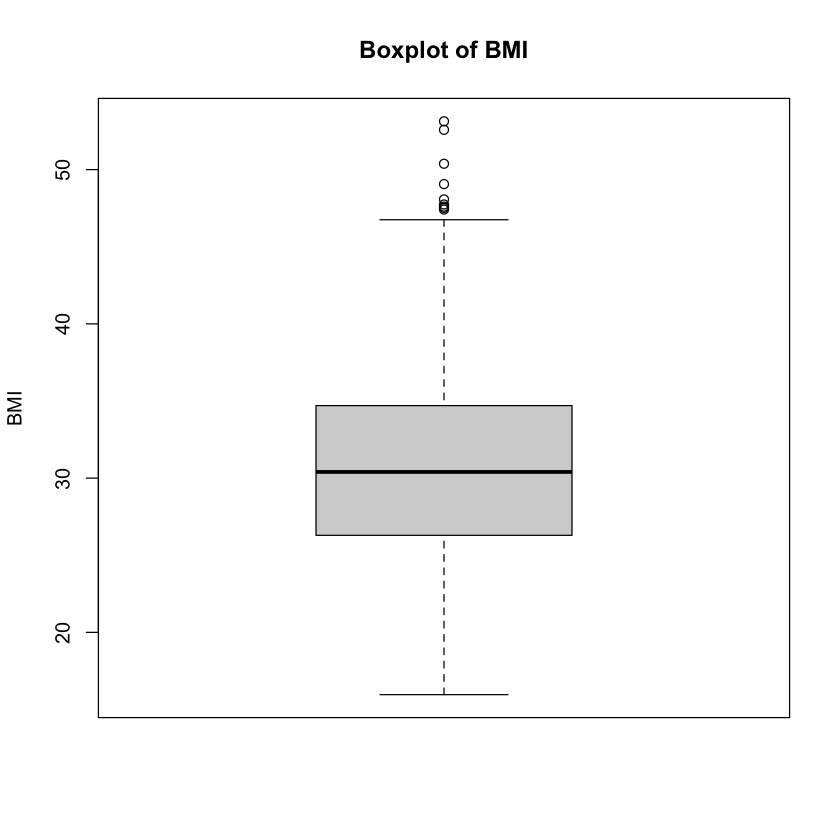

In [49]:
## Summary of BMI
hist(data$bmi, main = "Histogram of BMI", xlab = "BMI")
boxplot(data$bmi, main = "Boxplot of BMI", ylab = "BMI")
print(paste("Minimum BMI: ", min(data$bmi)))
print(paste("Maximum BMI: ", max(data$bmi)))
print(paste("Median BMI: ", median(data$bmi)))
print(paste("Mean BMI: ", mean(data$bmi)))
print(quantile(data$bmi))

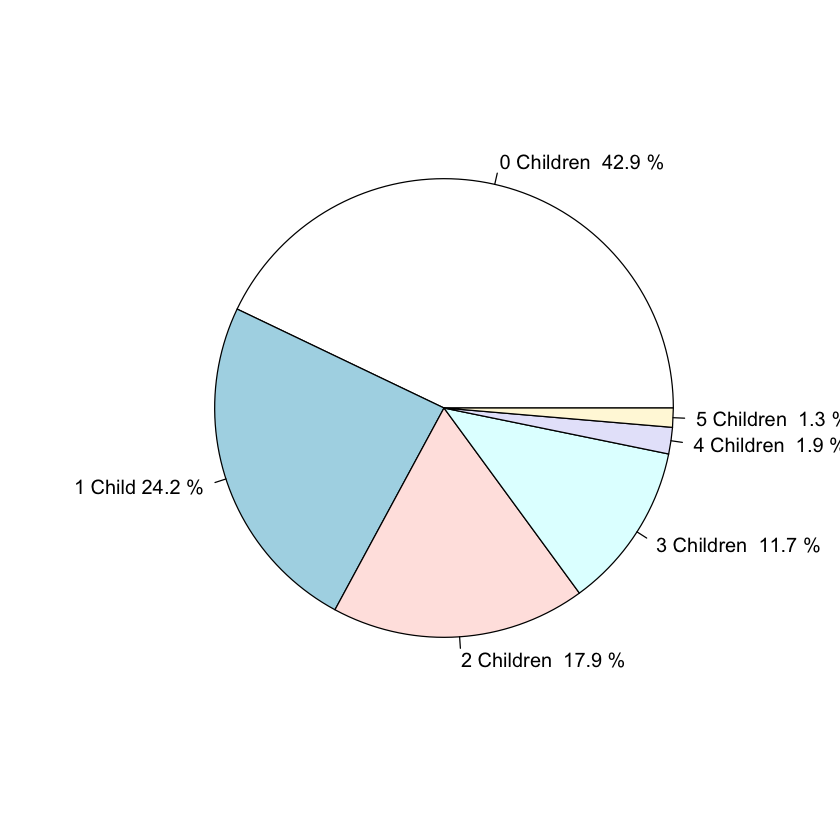

In [46]:
## Summary of Children
pie(children, labels = c(paste("0 Children ", child_0_percentage, "%"), paste("1 Child", child_1_percentage, "%"), paste("2 Children ", child_2_percentage, "%"), paste("3 Children ", child_3_percentage, "%"), paste("4 Children ", child_4_percentage, "%"), paste("5 Children ", child_5_percentage, "%")))
# Minimum Number of Children: 0, Maximum number of Children = 5

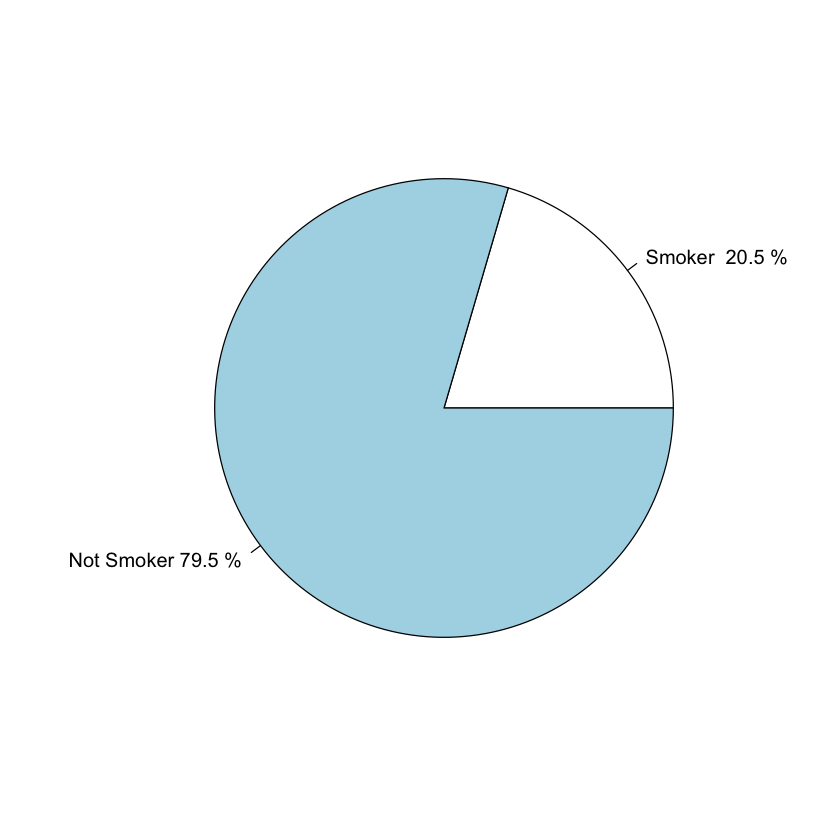

In [50]:
## Summary of Smoker
pie(smoker, labels = c(paste("Smoker ", smoker_yes_percentage, "%"), paste("Not Smoker", smoker_no_percentage, "%")))

## 3. Models -- Methods & Plan

In [19]:
full_model <- lm(charges ~ age + sex + bmi + children + smoker + region, data = data)
summary(full_model)


Call:
lm(formula = charges ~ age + sex + bmi + children + smoker + 
    region, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-11304.9  -2848.1   -982.1   1393.9  29992.8 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -11938.5      987.8 -12.086  < 2e-16 ***
age                256.9       11.9  21.587  < 2e-16 ***
sexmale           -131.3      332.9  -0.394 0.693348    
bmi                339.2       28.6  11.860  < 2e-16 ***
children           475.5      137.8   3.451 0.000577 ***
smokeryes        23848.5      413.1  57.723  < 2e-16 ***
regionnorthwest   -353.0      476.3  -0.741 0.458769    
regionsoutheast  -1035.0      478.7  -2.162 0.030782 *  
regionsouthwest   -960.0      477.9  -2.009 0.044765 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6062 on 1329 degrees of freedom
Multiple R-squared:  0.7509,	Adjusted R-squared:  0.7494 
F-statistic: 500.8 on 8 and 1329 D

In [45]:
key_features_model <- lm(charges ~ age + bmi + children + smoker, data = data)
summary(key_features_model)


Call:
lm(formula = charges ~ age + bmi + children + smoker, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-11897.9  -2920.8   -986.6   1392.2  29509.6 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -12102.77     941.98 -12.848  < 2e-16 ***
age            257.85      11.90  21.675  < 2e-16 ***
bmi            321.85      27.38  11.756  < 2e-16 ***
children       473.50     137.79   3.436 0.000608 ***
smokeryes    23811.40     411.22  57.904  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6068 on 1333 degrees of freedom
Multiple R-squared:  0.7497,	Adjusted R-squared:  0.7489 
F-statistic: 998.1 on 4 and 1333 DF,  p-value: < 2.2e-16
